# **CSMODEL Project: AI Copilot in Education Analysis**
Group 5



## **Introduction**

This dataset was made by Emille Villacerat and Celbert Himang as part of their paper “Data on behavioural intention to use AI copilot through TAM and AI ecological education policy lens” last May 13, 2025. According to the paper, the study introduces a dataset examining the behavioral intention of the faculty and students of Cebu Technological University to adopt AI Copilot. The analysis is grounded in the Technology Acceptance Model (TAM) and the AI Ecological Education Policy Framework. Data was gathered through a quantitative survey, administered digitally to a diverse group of participants, including professors and students from different academic departments and year levels.<br>

The researchers gathered the data through an online, five point Likert Scale survey to assess the perceptions of AI Copilot adoption amongst respondents of Cebu Technological University. The questions used in the survey were derived from existing literature on technology acceptance and educational frameworks.

Each row in the dataset corresponds to one respondent. 414 responses were gathered, however only 396 were deemed valid responses due to low variability of answers from 18 respondents. The whole survey, ranging from demographics, to likert scale questions, totals to 45 variables.

## **Project Requirements**

#### Importing Libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#### Loading the Dataset

In [139]:
# Clone github repository for the data
!git clone https://github.com/CyAdrienneRamos/csmodel-mco.git
# Load the dataset into a dataframe
file_path_raw = '/content/csmodel-mco/dataset/survey_data_raw.xls'
raw_df = pd.read_excel(file_path_raw, nrows=414)

fatal: destination path 'csmodel-mco' already exists and is not an empty directory.


## **Data Preprocessing**

### **Initial Look Into the Dataset**

We first verify the completeness of the data. Then, we reduce the data by exclude the 18 responses removed in the analysis of the original study. We will then be cleaning up the colum data types and deal with the missing values. We will avoid dropping any of the responses in this section so as to allow us to later on verify the validity of the dataset used by the original study.

#### Inspecting the Head and Tail

We start the data preprocessing process by inspecting the `head()` and `tail()` of the dataframe. We do this to do a first check for the completeness of the rows and columns of the dataset. It also helps identify preparations needed for the rest of the process.

We can immediately see that the column labels are very long and messy. There are also unnecessary columns that we will deal with later. Other than those, the starting and ending rows match the dataset.



In [140]:
# Check if the data is properly imported
raw_df.head(3)

,TimeStamp(OnOpenForm),Timestamp(OnClickSubmit),Duration(in Minutes),"I am aware of the purpose of this survey questionnaire on AI Copilot in Education: A Study on Usage and Acceptance through TAM and AI Ecological Policy Lens. The survey is designed to understand my experiences, perceptions, and attitudes toward using AI",Age:,Sex:,Highest Educational Attainment,Type of respondent,College:,"If student, specify year level",...,PEOU2:My interaction with AI Copilot does not require much mental effort.,PEOU3: It is easy to become skillful using AI Copilot,PEOU4: I found AI Copilot easy to use.,PEOU5: It would be easy for me to find information using AI Copilot.,ITU1: I intend to use AI Copilot to a greater extent.,ITU2: I think doing my schoolwork using AI Copilot is interesting.,ITU3: I believe that AI Copilot is a valuable tool for doing my schoolwork.,ITU4: I will recommend AI Copilot to another schoolmate or colleague.,ITU5: I believe that AI Copilot has given me a unique experience.,Please check the box(es) corresponding to the barriers and challenges that may be encountered in the continuous usage of AI Copilot
0,2024-10-17 21:24:58.000,2024-10-17 21:36:58.000,12,I consent voluntarily to participate in this s...,21,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,...,4,4,5,5,4,4,5,4,4,AI Copilot ethical dilemma
1,2024-10-17 21:17:47.246,2024-10-17 21:28:47.246,11,I consent voluntarily to participate in this s...,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,...,5,5,5,4,3,5,5,5,5,"AI Copilot ethical dilemma, Inflexible teachin..."
2,2024-10-17 21:20:07.997,2024-10-17 21:34:07.997,14,I consent voluntarily to participate in this s...,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,...,3,2,3,5,4,4,3,3,4,AI Copilot ethical dilemma


In [141]:
# Check if the data is properly imported
raw_df.tail(3)

,TimeStamp(OnOpenForm),Timestamp(OnClickSubmit),Duration(in Minutes),"I am aware of the purpose of this survey questionnaire on AI Copilot in Education: A Study on Usage and Acceptance through TAM and AI Ecological Policy Lens. The survey is designed to understand my experiences, perceptions, and attitudes toward using AI",Age:,Sex:,Highest Educational Attainment,Type of respondent,College:,"If student, specify year level",...,PEOU2:My interaction with AI Copilot does not require much mental effort.,PEOU3: It is easy to become skillful using AI Copilot,PEOU4: I found AI Copilot easy to use.,PEOU5: It would be easy for me to find information using AI Copilot.,ITU1: I intend to use AI Copilot to a greater extent.,ITU2: I think doing my schoolwork using AI Copilot is interesting.,ITU3: I believe that AI Copilot is a valuable tool for doing my schoolwork.,ITU4: I will recommend AI Copilot to another schoolmate or colleague.,ITU5: I believe that AI Copilot has given me a unique experience.,Please check the box(es) corresponding to the barriers and challenges that may be encountered in the continuous usage of AI Copilot
411,2024-10-28 12:41:05.672,2024-10-28 12:50:05.672,9,I consent voluntarily to participate in this s...,19,Female,College Level,Student,"College of Computer, Information and Communica...",Second Year,...,2,2,4,4,4,4,2,4,4,"AI Copilot ethical dilemma, AI Copilot privacy..."
412,2024-10-28 14:36:35.273,2024-10-28 14:50:35.273,14,I consent voluntarily to participate in this s...,19,Female,College Level,Student,College of Management and Entrepreneurship,Second Year,...,3,3,3,3,3,3,3,4,4,"AI Copilot ethical dilemma, AI Copilot privacy..."
413,2024-10-28 19:15:49.326,2024-10-28 19:29:49.326,14,I consent voluntarily to participate in this s...,19,Female,College Level,Student,College of Management and Entrepreneurship,Second Year,...,3,3,4,4,3,4,5,5,5,"AI Copilot privacy concern, AI Copilot gives i..."


#### Cleaning the columns

We can start by removing the unnecessary columns and renaming the rest with more concise labels and use the question codes from the survey questionnaire if applicable. We will also not be using the columns for timestamps, duration, and consent.

In [142]:
# We will not be using the timestamps, duration, and consent
raw_df = raw_df.drop(columns=raw_df.columns[[0, 1, 3]])
raw_df.columns

Index(['Duration(in Minutes)', 'Age:', 'Sex:',
       'Highest  Educational Attainment', 'Type of respondent', 'College:',
       'If student, specify year level', 'Years of AI usage',
       'RAE1: The assessment design should allow AI such as AI Copilot to enhance learning outcomes.',
       'RAE2: An assessment must focus on students' comprehension',
       'RAE3: Assessment must be automated scoring.',
       'RAE4: Teachers must use portfolio assessments to track students’ progress. ',
       'RAE5: Teachers must use rubrics to set clear performance standards, allowing for fair and organized assessment of student work.',
       'RAE6: The assessment design should not allow AI Copilot to enhance learning outcomes. ',
       'GS1: Teachers must teach the students to evaluate the credibility of AI Copilot-generated content.',
       'GS2: Teachers must create learning activities incorporating instructional strategies that enhance students’ critical thinking skills.',
       'GS3: The

In [143]:
# We first take the parts before each ":"
raw_df.columns = raw_df.columns.str.split(':').str[0]
raw_df.columns

Index(['Duration(in Minutes)', 'Age', 'Sex', 'Highest  Educational Attainment',
       'Type of respondent', 'College', 'If student, specify year level',
       'Years of AI usage', 'RAE1', 'RAE2', 'RAE3', 'RAE4', 'RAE5', 'RAE6',
       'GS1', 'GS2', 'GS3', 'GS4', 'GS5', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5',
       'BA1', 'BA2', 'BA3', 'BA4', 'BA5', 'PU1', 'PU2', 'PU3', 'PU4', 'PU5',
       'PU6', 'PEOU1', 'PEOU2', 'PEOU3', 'PEOU4', 'PEOU5', 'ITU1', 'ITU2',
       'ITU3', 'ITU4', 'ITU5',
       'Please check the box(es) corresponding to the barriers and challenges that may be encountered in the continuous usage of AI Copilot'],
      dtype='object')

In [144]:
# Then we list the replacement names for some of the labels
columns_keys_map = {
    'Duration(in Minutes)':'Duration',
    'Highest  Educational Attainment':'Education',
    'Type of respondent':'Respondent',
    'If student, specify year level':'YearLevel',
    'Years of AI usage':'UsageYears',
    'Please check the box(es) corresponding to the barriers and challenges that may be encountered in the continuous usage of AI Copilot':'Barriers'
}
# Then apply the changes
raw_df.columns = [columns_keys_map.get(x, x) for x in raw_df.columns]
raw_df.columns

Index(['Duration', 'Age', 'Sex', 'Education', 'Respondent', 'College',
       'YearLevel', 'UsageYears', 'RAE1', 'RAE2', 'RAE3', 'RAE4', 'RAE5',
       'RAE6', 'GS1', 'GS2', 'GS3', 'GS4', 'GS5', 'PS1', 'PS2', 'PS3', 'PS4',
       'PS5', 'BA1', 'BA2', 'BA3', 'BA4', 'BA5', 'PU1', 'PU2', 'PU3', 'PU4',
       'PU5', 'PU6', 'PEOU1', 'PEOU2', 'PEOU3', 'PEOU4', 'PEOU5', 'ITU1',
       'ITU2', 'ITU3', 'ITU4', 'ITU5', 'Barriers'],
      dtype='object')

In [145]:
raw_df.head()

,Duration,Age,Sex,Education,Respondent,College,YearLevel,UsageYears,RAE1,RAE2,...,PEOU2,PEOU3,PEOU4,PEOU5,ITU1,ITU2,ITU3,ITU4,ITU5,Barriers
0,12,21,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,0 - 1 year,5,5,...,4,4,5,5,4,4,5,4,4,AI Copilot ethical dilemma
1,11,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,0 - 1 year,5,3,...,5,5,5,4,3,5,5,5,5,"AI Copilot ethical dilemma, Inflexible teachin..."
2,14,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,1 - 2 years,5,5,...,3,2,3,5,4,4,3,3,4,AI Copilot ethical dilemma
3,15,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,1 - 2 years,4,4,...,4,4,4,4,4,3,3,3,3,"AI Copilot privacy concern, Insufficient budge..."
4,13,19,Female,College Level,Student,"College of Computer, Information and Communica...",Second Year,0 - 1 year,4,5,...,4,4,4,4,4,4,4,4,4,Insufficient budget for the adoption of AI Cop...


#### Completeness and Data Types

Looking at the `df.info()`, we can see that we have some null values in the `YearLevel` and `Barriers` columns. Some column data types also defaulted to objects. We will be dealing with these in the following sections.

In [146]:
# Here we see the columns, number of rows, data types, and null counts
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Duration    414 non-null    int64 
 1   Age         414 non-null    int64 
 2   Sex         414 non-null    object
 3   Education   414 non-null    object
 4   Respondent  414 non-null    object
 5   College     414 non-null    object
 6   YearLevel   387 non-null    object
 7   UsageYears  414 non-null    object
 8   RAE1        414 non-null    int64 
 9   RAE2        414 non-null    int64 
 10  RAE3        414 non-null    int64 
 11  RAE4        414 non-null    int64 
 12  RAE5        414 non-null    int64 
 13  RAE6        414 non-null    int64 
 14  GS1         414 non-null    int64 
 15  GS2         414 non-null    int64 
 16  GS3         414 non-null    int64 
 17  GS4         414 non-null    int64 
 18  GS5         414 non-null    int64 
 19  PS1         414 non-null    int64 
 20  PS2       

#### Removing the 18 excluded respondents

Since the study did not mention the specific responses that they have excluded, then we will attempt to identify the 18 'low variability' responses. An assumption would be that these will be the 18 lowest standard deviation for the 1-5 Likert scale questions.

In [147]:
# Take Likert scale questions
likert = raw_df.loc[:, 'RAE1':'ITU5']
# Compute for std
raw_df['likert_std'] = likert.std(axis=1)
# Remove the suspicious entries
df = raw_df.sort_values(by='likert_std').iloc[18:]

We then verify the values of the `clean_df` with the values shown in the paper.


In [148]:
# The age group counts match the paper's values
age_bins = [0, 24, 34, 44, 54, 100]
age_bin_labels = ['18-24 years', '25-34 years', '35-44 years', '45-54 years', '55+ years']
df['AgeGroup'] =  pd.cut(df['Age'], bins=age_bins, labels=age_bin_labels)
df['AgeGroup'].value_counts()

,count
AgeGroup,
18-24 years,374
25-34 years,12
35-44 years,6
45-54 years,3
55+ years,1


In [149]:
# The college counts match the paper's values
df['College'].value_counts()

,count
College,
"College of Computer, Information and Communications Technology",138
College of Technology,71
College of Education,67
College of Engineering,46
College of Arts and Sciences,35
College of Management and Entrepreneurship,34
College of Nursing,3
College of Hospitality and tourism management,1
College of Customs,1


In [150]:
# The mean values for these columns match the values presented in the paper.
df.loc[:, 'RAE1':'RAE5'].mean()

,0
RAE1,3.646465
RAE2,4.090909
RAE3,3.419192
RAE4,4.025253
RAE5,4.280303


Based on the tests, we now accept this cleaned dataframe containing the data used in the paper.

In [151]:
df = df.reset_index(drop=True)

### **Data Cleaning - Demographic Section**

#### Age

There are no problems with the Age column.

In [152]:
# No problems with the values
df['Age'].describe()

,Age
count,396.000000
mean,20.757576
std,4.498868
min,18.000000
25%,19.000000
50%,20.000000
75%,21.000000
max,57.000000


#### Sex

We convert the data type to categorical.

In [153]:
# No problems with the unique values and counts
df['Sex'].value_counts(dropna=False)

,count
Sex,
Female,200
Male,196


In [154]:
# Convert to categorical
df['Sex'] = pd.Categorical(df['Sex'], categories=df['Sex'].unique())

#### Respondent

We convert the data type to categorical.

In [155]:
# No problems with the unique values and counts
df['Respondent'].value_counts(dropna=False)

,count
Respondent,
Student,372
Teacher,24


In [156]:
# Convert to categorical
df['Respondent'] = pd.Categorical(df['Respondent'], categories=df['Respondent'].unique())

#### Usage Years

We convert the data type to categorical.

In [157]:
# No problems with the unique values and counts
df['UsageYears'].value_counts(dropna=False)

,count
UsageYears,
1 - 2 years,185
0 - 1 year,137
3 - 4 years,47
beyond 4 years,27


In [158]:
# Convert to categorical
df['UsageYears'] = pd.Categorical(df['UsageYears'], categories=df['UsageYears'].unique())

#### College

We shorten the names of the colleges and convert the data type to categorical.

In [159]:
# No problems with the unique values and counts
df['College'].value_counts(dropna=False)

,count
College,
"College of Computer, Information and Communications Technology",138
College of Technology,71
College of Education,67
College of Engineering,46
College of Arts and Sciences,35
College of Management and Entrepreneurship,34
College of Nursing,3
College of Hospitality and tourism management,1
College of Customs,1


In [160]:
# Shorten the names
college_map = {
    'College of Computer, Information and Communications Technology': 'CICT',
    'College of Technology': 'COT',
    'College of Education': 'COE',
    'College of Engineering': 'COEENG',
    'College of Arts and Sciences': 'CAS',
    'College of Management and Entrepreneurship': 'CME',
    'College of Nursing': 'CON',
    'College of Hospitality and tourism management ': 'CHTM',
    'College of Customs': 'COC'
}

df['College'] = df['College'].map(college_map)


In [161]:
# Convert to categorical
df['College'] = pd.Categorical(df['College'], categories=df['College'].unique())

#### Year Level

Looking at the 27 responses with missing `YearLevel` entries, we can see that 23 of these came from the responses of a teacher, while the other 4 were from students. While it does not make sense for a student to not have a year level, we will be ignoring these for now. We use a placeholder value `NA` for the missing, and converted the data type to categorical.

In [162]:
df['YearLevel'].value_counts(dropna=False)

,count
YearLevel,
Second Year,194
First Year,94
Third Year,54
Fourth Year,27
NaN,27


In [163]:
df['YearLevel'] = df['YearLevel'].fillna('NA')
df['YearLevel'].value_counts(dropna=False)

,count
YearLevel,
Second Year,194
First Year,94
Third Year,54
Fourth Year,27
NA,27


In [164]:
# Convert to categorical
df['YearLevel'] = pd.Categorical(df['YearLevel'], categories=df['YearLevel'].unique())

#### Education

Looking at the unique values and distribution of the respondents, we will be dropping this column due to the lack of support for the options outside the vague "College Level" option.

In [165]:
df.groupby('Respondent', observed=False)['Education'].value_counts()

Respondent  Education                            
Student     College Level                            361
            Bachelor's Degree                          8
            Currently A 2nd Year College Student       1
            Senior High School Graduate                1
            Still a college student                    1
            Doctorate Degree (PhD, EdD)                0
            Master's Degree                            0
            Professional Degree (JD, MD)               0
Teacher     Bachelor's Degree                          8
            Master's Degree                            8
            Doctorate Degree (PhD, EdD)                5
            College Level                              2
            Professional Degree (JD, MD)               1
            Currently A 2nd Year College Student       0
            Senior High School Graduate                0
            Still a college student                    0
Name: count, dtype: int64

In [166]:
education_map = {
    "College Level": "College Level",
    "Currently A 2nd Year College Student": "College Level",
    "Still a college student": "College Level",
    "Senior High School Graduate": "College Level",
    "Bachelor's Degree": "Bachelor’s Degree",
    "Master's Degree": "Master’s Degree",
    "Doctorate Degree (PhD, EdD)": "Doctorate Degree (PhD. EdD)",
    "Professional Degree (JD, MD)": "Doctorate Degree (PhD. EdD)"
}

df['Education'] = df['Education'].map(education_map)

In [167]:
df.groupby('Respondent', observed=False)['Education'].value_counts()

Respondent  Education                  
Student     College Level                  361
            Bachelor’s Degree                8
            Doctorate Degree (PhD. EdD)      0
            Master’s Degree                  0
Teacher     Bachelor’s Degree                8
            Master’s Degree                  8
            Doctorate Degree (PhD. EdD)      6
            College Level                    2
Name: count, dtype: int64

### **Data Cleaning - Main Section**

#### Likert Scale Questions

The likert scale questions are all completely filled, with the correct data type for all corresponding columns. No change is needed.

#### Barriers

The corresponding question for the `Barrier` column is a checkbox style question, which allows the respondent to select multiple options or provide their own through the "Others" option. In the dataset, these options are all joined together using commas.

We will be cleaning the data and separating it into the options as provided in the survey. As the rows with input given in the "Others" option are very few and most of these do have other options selected, we will be ignoring those "Others" input and simply indicate that they have chosen to write their own option.

In [168]:
# Check the values of the Barriers column
df['Barriers']

,Barriers
0,AI Copilot gives inappropriate or misaligned t...
1,Lack of cognitive scaffolding for students
2,Insufficient budget for the adoption of AI Cop...
3,"AI Copilot privacy concern, Inflexible teachin..."
4,"AI Copilot ethical dilemma, AI Copilot privacy..."
...,...
391,"AI Copilot ethical dilemma, AI Copilot privacy..."
392,"AI Copilot ethical dilemma, AI Copilot privacy..."
393,"Inflexible teaching methods and curricula, Lac..."
394,Insufficient budget for the adoption of AI Cop...


We first deal with the missing value.

In [169]:
# Deal with the missing value
df['Barriers'] = df['Barriers'].fillna('NA')

We then split the entries into the individual options selected.

In [170]:
# Provided options in the survey and their codes
# NA was included to match the placeholder
barriers_provided = {
    'AI Copilot ethical dilemma':'BC1',
    'AI Copilot privacy concern':'BC2',
    'AI Copilot gives inappropriate or misaligned text suggestions':'BC3',
    'Inflexible teaching methods and curricula':'BC4',
    'Insufficient budget for the adoption of AI Copilot':'BC5',
    'Lack of AI literacy':'BC6',
    'Lack of cognitive scaffolding for students':'BC7',
    'Lack of teacher confidence and digital competence':'BC8',
    'Unequal access to AI Copilot':'BC9',
    'User resistance to AI Copilot adoption':'BC10',
    'NA':'NA'
}

# Split individual options
# - The regex splits them by the commas, ignoring commas within sentences
# - The strip(', ') deals with blank input on "Others" option
barriers_split = [set(map(str.strip, re.split(r',\s+(?=[A-Z])', x.strip(', ')))) for x in df['Barriers']]

# Get all unique chosen options
barriers = set.union(*barriers_split)
barriers

{'AI Copilot ethical dilemma',
 'AI Copilot gives inappropriate or misaligned text suggestions',
 'AI Copilot privacy concern',
 'Decline in the cognitive processing of students as they will become dependent on AI usage rather than actively creating, participating, and solving their own problems.',
 'Dependency and misuse of AI Copilot',
 "I don't have any experience yet using AI Copilot",
 'Inflexible teaching methods and curricula',
 'Insufficient budget for the adoption of AI Copilot',
 'Lack of AI literacy',
 'Lack of cognitive scaffolding for students',
 'Lack of cognitive scaffolding for students, students might rely permanently on AI Copilot',
 'Lack of teacher confidence and digital competence',
 "Like sometimes they don't give you accurate answers or the answers you've been looking for. Nothing beats experiences from teachers.",
 'NA',
 'Nahimong tapulan ang mga  people tungod naay AI',
 'No further knowledge about AI copilot',
 'Over-reliance and Skill Degradation',
 "Student

In [171]:
# Get other inputs
barriers_others = barriers.difference(set(barriers_provided.keys()))
barriers_others

{'Decline in the cognitive processing of students as they will become dependent on AI usage rather than actively creating, participating, and solving their own problems.',
 'Dependency and misuse of AI Copilot',
 "I don't have any experience yet using AI Copilot",
 'Lack of cognitive scaffolding for students, students might rely permanently on AI Copilot',
 "Like sometimes they don't give you accurate answers or the answers you've been looking for. Nothing beats experiences from teachers.",
 'Nahimong tapulan ang mga  people tungod naay AI',
 'No further knowledge about AI copilot',
 'Over-reliance and Skill Degradation',
 "Student won't be learning in the correct way, but some can still use AI for learning and self studying.",
 'Students might weaken their ability to think critically and logically'}

In [172]:
# Inspect one of the entries
target_row = [barriers_split.index(row) for row in barriers_split if 'Lack of cognitive scaffolding for students, students might rely permanently on AI Copilot' in row][0]
barriers_split[target_row]

{'Lack of cognitive scaffolding for students, students might rely permanently on AI Copilot'}

In [173]:
# Fix that entry
barriers_split[target_row] = {'Lack of cognitive scaffolding for students', 'Students might rely permanently on AI Copilot'}
barriers = set.union(*barriers_split)
barriers

{'AI Copilot ethical dilemma',
 'AI Copilot gives inappropriate or misaligned text suggestions',
 'AI Copilot privacy concern',
 'Decline in the cognitive processing of students as they will become dependent on AI usage rather than actively creating, participating, and solving their own problems.',
 'Dependency and misuse of AI Copilot',
 "I don't have any experience yet using AI Copilot",
 'Inflexible teaching methods and curricula',
 'Insufficient budget for the adoption of AI Copilot',
 'Lack of AI literacy',
 'Lack of cognitive scaffolding for students',
 'Lack of teacher confidence and digital competence',
 "Like sometimes they don't give you accurate answers or the answers you've been looking for. Nothing beats experiences from teachers.",
 'NA',
 'Nahimong tapulan ang mga  people tungod naay AI',
 'No further knowledge about AI copilot',
 'Over-reliance and Skill Degradation',
 "Student won't be learning in the correct way, but some can still use AI for learning and self studyin

Construct a dataframe from the selected barrier options.

In [174]:
# Convert to df with option codes as column names and 1 to indicate selection
# Count options not in the provided options as "BCX" which corresponds to the
# "Others" option
barriers_df = pd.DataFrame([{barriers_provided.get(item, "BCX"): 1 for item in row} for row in barriers_split]).fillna(0)
# Rearrange the columns, remove the placeholder NA
barriers_df = barriers_df[['BC1', 'BC2', 'BC3', 'BC4', 'BC5', 'BC6', 'BC7', 'BC8', 'BC9', 'BC10', 'BCX']]
barriers_df

,BC1,BC2,BC3,BC4,BC5,BC6,BC7,BC8,BC9,BC10,BCX
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
391,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
392,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
394,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


Change the `Barriers` column with the new columns.

In [175]:
# Replace the Barriers column with the new columns
df = df.drop(['Barriers'], axis=1)
df = pd.concat([df, barriers_df], axis=1)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Duration    396 non-null    int64   
 1   Age         396 non-null    int64   
 2   Sex         396 non-null    category
 3   Education   393 non-null    object  
 4   Respondent  396 non-null    category
 5   College     396 non-null    category
 6   YearLevel   396 non-null    category
 7   UsageYears  396 non-null    category
 8   RAE1        396 non-null    int64   
 9   RAE2        396 non-null    int64   
 10  RAE3        396 non-null    int64   
 11  RAE4        396 non-null    int64   
 12  RAE5        396 non-null    int64   
 13  RAE6        396 non-null    int64   
 14  GS1         396 non-null    int64   
 15  GS2         396 non-null    int64   
 16  GS3         396 non-null    int64   
 17  GS4         396 non-null    int64   
 18  GS5         396 non-null    int64   
 19  PS1     

### **Adding Aggregate Columns**

We will be adding columns for the means of the ratings within each construct group, excluding the opposite questions (labeled sincerity questions in the survey).

---



In [192]:
likert_group_means = ['RAEM', 'GSM', 'PSM', 'BAM', 'PUM', 'PEOUM', 'ITUM']

df['RAEM'] = df.loc[:, "RAE1":"RAE5"].mean(axis=1)
df['GSM'] = df.loc[:, "GS1":"GS5"].mean(axis=1)
df['PSM'] = df.loc[:, "PS1":"PS5"].mean(axis=1)
df['BAM'] = df.loc[:, "BA1":"BA5"].mean(axis=1)
df['PUM'] = df.loc[:, "PU1":"PU5"].mean(axis=1)
df['PEOUM'] = df.loc[:, "PEOU1":"PEOU5"].mean(axis=1)
df['ITUM'] = df.loc[:, "ITU1":"ITU5"].mean(axis=1)

# **Exploratory Data Analysis**

For this section, we will be looking at the measures and visualizations to answer the following EDA questions:

1. What are the demographic characteristics of respondents, and are there unusual patterns?
2. Are there indications of careless or invalid responses?
3. How do the descriptive statistics of the constructs change after removing low-quality responses?
4. Does removing low-quality responses affect relationships among constructs

### What are the demographic characteristics of respondents, and are there unusual patterns?

We start by plotting the distributions of the respondents by each demographic category. This will give us an insight on the possible bias in the data.

In [223]:
def add_percent_histplot(axes, i, df, col):
  total = len(df[col].dropna())
  sns.histplot(
      data=df,
      x=col,
      stat='percent',
      ax=axes[i],
      discrete=True
  )

  axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
  axes[i].set_ylabel('Percentage')
  axes[i].set_xlabel('')
  axes[i].tick_params(axis='x', rotation=60)

  for container in axes[i].containers:
      axes[i].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

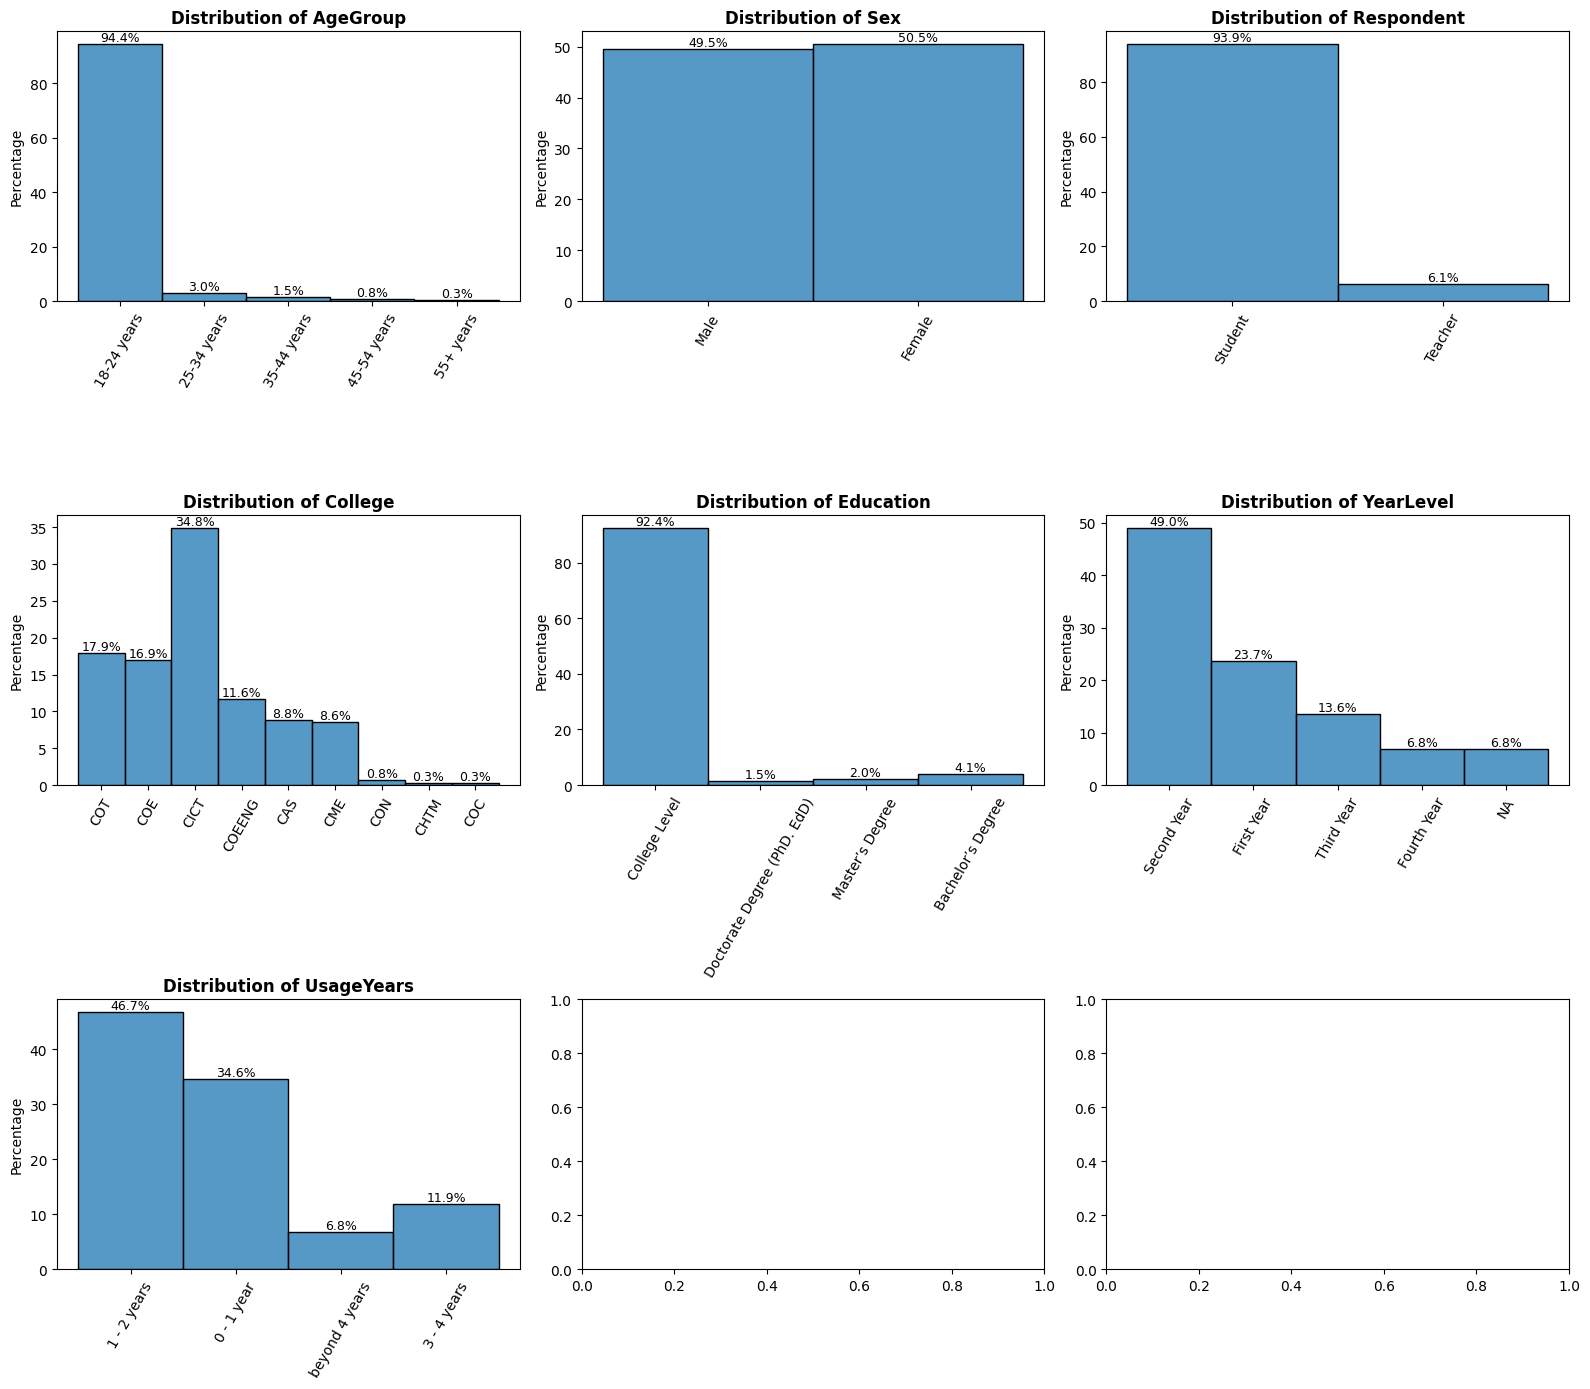

In [224]:
demo_cols = ['AgeGroup', 'Sex', 'Respondent', 'College', 'Education', 'YearLevel', 'UsageYears']

fig, axes = plt.subplots(3, 3, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(demo_cols):
    add_percent_histplot(axes, i, df, col)

plt.tight_layout()
plt.show()

In [180]:
demographic_summary = {}
for col in demo_cols:
    counts = df[col].value_counts().to_frame('Count')
    counts['Percentage'] = 100 * counts['Count'] / counts['Count'].sum()
    demographic_summary[col] = counts
    print(f"\n{col} Summary:\n", counts, "\n")


AgeGroup Summary:
              Count  Percentage
AgeGroup                      
18-24 years    374   94.444444
25-34 years     12    3.030303
35-44 years      6    1.515152
45-54 years      3    0.757576
55+ years        1    0.252525 


Sex Summary:
         Count  Percentage
Sex                      
Female    200   50.505051
Male      196   49.494949 


Respondent Summary:
             Count  Percentage
Respondent                   
Student       372   93.939394
Teacher        24    6.060606 


College Summary:
          Count  Percentage
College                   
CICT       138   34.848485
COT         71   17.929293
COE         67   16.919192
COEENG      46   11.616162
CAS         35    8.838384
CME         34    8.585859
CON          3    0.757576
CHTM         1    0.252525
COC          1    0.252525 


Education Summary:
                              Count  Percentage
Education                                     
College Level                  363   92.366412
Bachelor’s Degre

The dataset is primarily composed of young respondents aged 18–24 years (94.44%), with only a small fraction belonging to older age brackets. This concentration indicates that the survey largely reflects the views of younger individuals, most of whom are still in college. The sample also shows that students make up 93.94% of all respondents, while only 6.06% are teachers. This strong imbalance suggests that insights drawn from the data will predominantly represent student perspectives rather than those of educators or staff.

The gender distribution is balanced, with females (50.51%) and males (49.49%) almost equally represented, minimizing the likelihood of gender bias in subsequent analyses. In terms of educational attainment, a large majority are at the college level (92.37%), with smaller portions having completed a Bachelor’s (4.07%), Master’s (2.04%), or Doctorate degree (1.53%). This confirms that the dataset is dominated by current college students, aligning with the age and respondent type distributions.

The College affiliation of respondents shows a strong concentration in technology-related disciplines. The College of Computer, Information and Communications Technology (CICT) contributes the most responses (34.85%), followed by the College of Technology (17.93%), College of Education (16.92%), and College of Engineering (11.62%). Other colleges make smaller contributions, such as Arts and Sciences, Management and Entrepreneurship, Nursing, Hospitality and Tourism Management, and Customs, each representing less than 10% of the total. This uneven participation suggests that the dataset is skewed toward technology-oriented programs, which could influence the attitudes reported, particularly in studies involving system use or digital adoption.

The year level distribution further supports this pattern where nearly half are second-year students (48.99%), followed by first-year students (23.74%), with smaller groups in the third (13.64%) and fourth year (6.82%), and 6.82% unspecified. This indicates that most respondents are relatively early in their academic journey, which might affect their experience-based evaluations. Similarly, the usage experience variable shows that 46.72% have used the system for 1–2 years, while 34.60% have less than a year of exposure. Only a few have used it for more than three years, suggesting that most participants are still in the early stages of adapting AI.

Overall, the demographic profile reveals a young, predominantly student population concentrated in technology-oriented colleges with limited long-term experience. While this provides a clear view of the primary user base, it also highlights potential sampling bias and representation issues that should be considered in later analyses, especially when examining patterns of behavior or perceptions across different demographic groups.

### Are there indications of careless or invalid responses?

In this section we will looking for likely invalid responses under the criteria used in the following processes.

#### Duration

We can start by checking the duration of each response. By simply looking at the plots, we can verify that there are no outliers for the duration column.

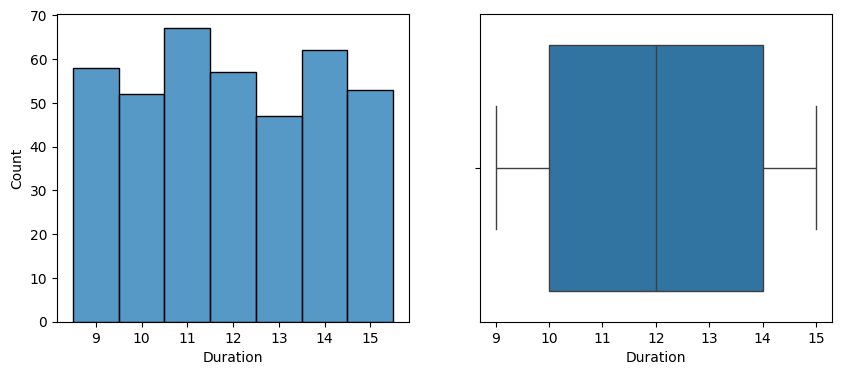

In [229]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

sns.histplot(df, x='Duration', discrete=True, ax=axes[0])
sns.boxplot(df, x='Duration', ax=axes[1])

plt.show()

#### Straight-lining

Next is we look for responses with low variability suggesting "straight-lining" which means that they simply selected similar or almost similar answers for each question.

<Axes: xlabel='likert_std', ylabel='Count'>

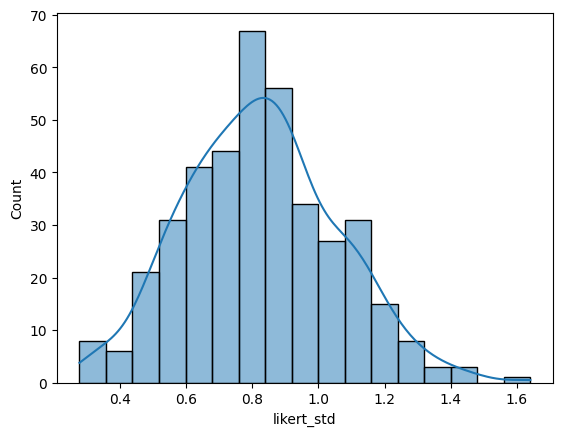

In [185]:
sns.histplot(df, x='likert_std', kde=True)

#### Opposite Questions

Lastly, we check for responses selecting similar ratings for two entirely opposite questions. There are two pairs of these opposite questions in the survey.

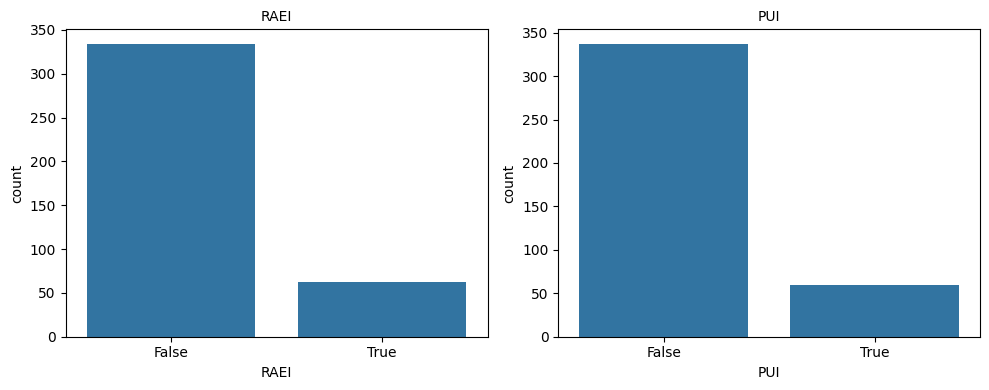

In [254]:
# Values will be true if the answer is likely invalid
df['RAEI'] = abs(6 - df['RAE1'] - df['RAE6']) > 2
df['PUI'] = abs(6 - df['PU1'] - df['PU6']) > 2

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

for i, col in enumerate(['RAEI', 'PUI']):
    sns.countplot(df, x=col, ax=axes[i])
    axes[i].set_title(col, fontsize=10)

plt.tight_layout()
plt.show()


#### Separating Identified Low-Quality Responses

In [259]:
# Low quality responses
lq_df = df[df['RAEI'] | df['PUI'] | (df['likert_std'] < 0.3)]
# High quality responses
hq_df = df[~df.index.isin(lq_df.index)]

### How do the descriptive statistics of the constructs change after removing low-quality responses?

In [261]:
df_stats = df.loc[:, 'RAE1':'ITU5'].agg(['mean', 'std']).T
hq_stats = hq_df.loc[:, 'RAE1':'ITU5'].agg(['mean', 'std']).T

indiv_stats = pd.concat([
    df_stats.add_suffix('_original'),
    hq_stats.add_suffix('_cleaned'),
], axis=1)


indiv_stats['mean_diff'] = df_stats['mean'] - hq_stats['mean']
indiv_stats['std_diff'] = df_stats['std'] - hq_stats['std']
indiv_stats

,mean_original,std_original,mean_cleaned,std_cleaned,mean_diff,std_diff
RAE1,3.646465,1.051226,3.535354,0.922465,0.111111,0.128761
RAE2,4.090909,1.027135,4.060606,0.967214,0.030303,0.059920
RAE3,3.419192,1.051117,3.323232,0.991466,0.095960,0.059650
RAE4,4.025253,1.043057,4.000000,0.969118,0.025253,0.073939
RAE5,4.280303,1.048068,4.286195,1.014545,-0.005892,0.033523
RAE6,3.053030,1.122707,2.777778,0.943207,0.275253,0.179500
GS1,3.931818,1.059208,3.912458,1.002908,0.019360,0.056300
GS2,4.257576,1.013488,4.272727,0.967214,-0.015152,0.046273
GS3,3.669192,1.000840,3.595960,0.918127,0.073232,0.082714
GS4,4.202020,0.983199,4.191919,0.922798,0.010101,0.060401


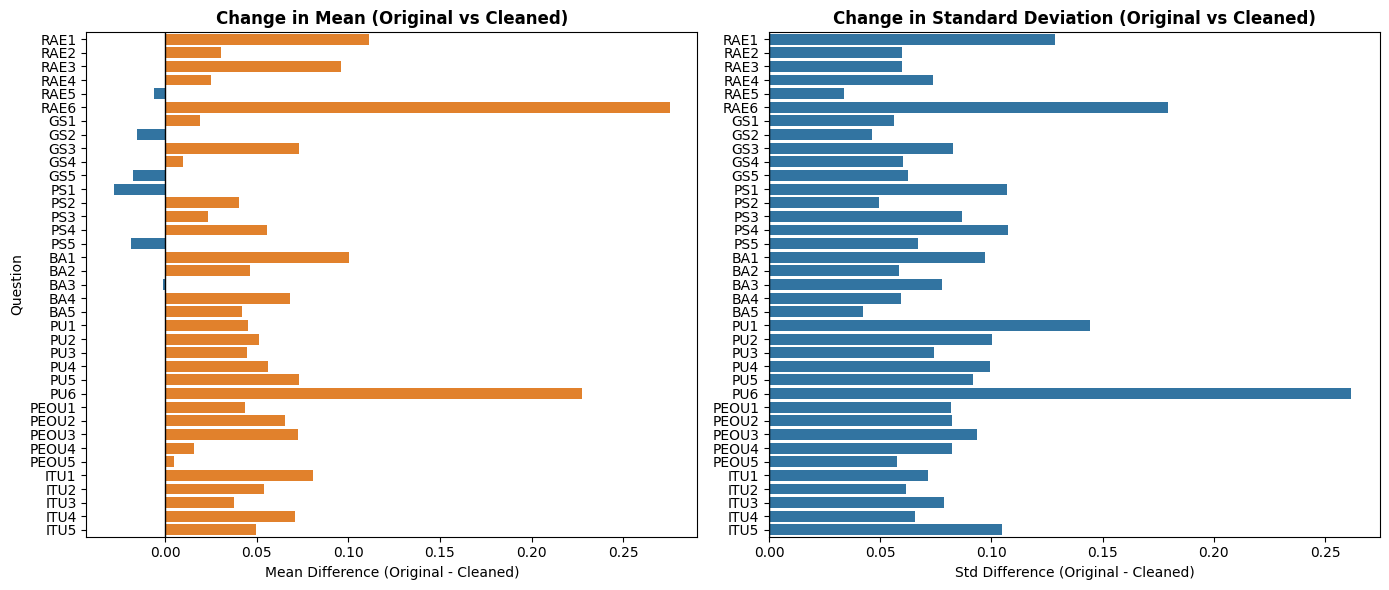

In [262]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(
    data=indiv_stats,
    x='mean_diff',
    y=indiv_stats.index,
    hue=indiv_stats['mean_diff'] > 0,
    ax=axes[0],
    legend=False
)

axes[0].axvline(0, color='black', linewidth=1)
axes[0].set_title('Change in Mean (Original vs Cleaned)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Mean Difference (Original - Cleaned)')
axes[0].set_ylabel('Question')

sns.barplot(
    data=indiv_stats,
    x='std_diff',
    y=indiv_stats.index,
    hue=indiv_stats['std_diff'] > 0,
    ax=axes[1],
    legend=False
)

axes[1].axvline(0, color='black', linewidth=1)
axes[1].set_title('Change in Standard Deviation (Original vs Cleaned)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Std Difference (Original - Cleaned)')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

### Does removing low-quality responses affect relationships among constructs

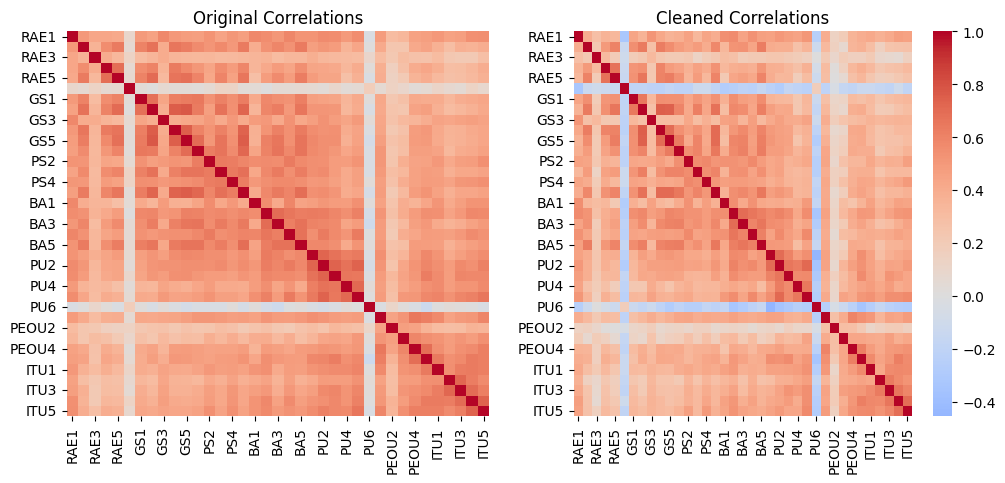

In [265]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(df.loc[:, 'RAE1':'ITU5'].corr(), ax=axes[0], cmap='coolwarm', center=0, cbar=False)
axes[0].set_title('Original Correlations')
sns.heatmap(hq_df.loc[:, 'RAE1':'ITU5'].corr(), ax=axes[1], cmap='coolwarm', center=0)
axes[1].set_title('Cleaned Correlations')
plt.show()

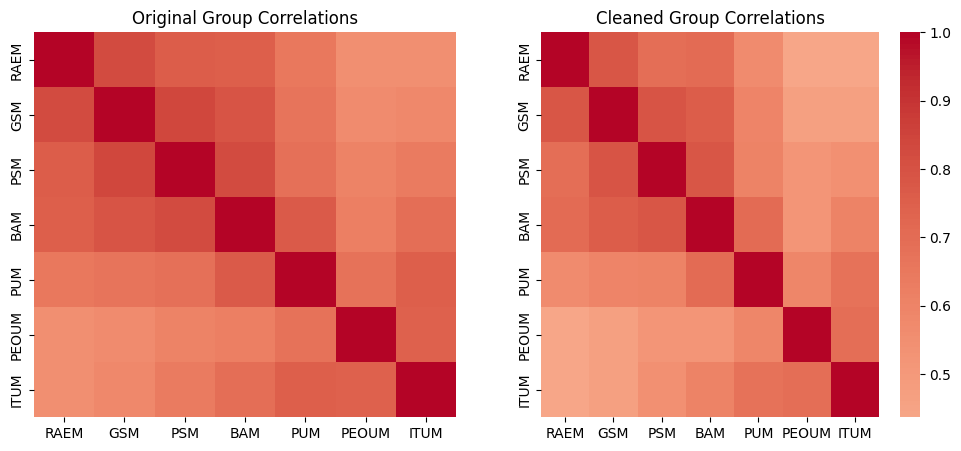

In [267]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(df.loc[:, 'RAEM':'ITUM'].corr(), ax=axes[0], cmap='coolwarm', center=0, cbar=False)
axes[0].set_title('Original Group Correlations')
sns.heatmap(hq_df.loc[:, 'RAEM':'ITUM'].corr(), ax=axes[1], cmap='coolwarm', center=0)
axes[1].set_title('Cleaned Group Correlations')
plt.show()